# 2º Entrega parcial - UNIT 34 ANALYTICAL METHODS

## Métodos numéricos

**Alumno: Javier Ruiz**

**Enunciado:**

1. Utilizar el método de bisección y el método de Newton–Raphson para encontrar las raíces de la función $f(x) = x^3 - 7x + 6$

2. Aplicar la regla del trapecio y la regla de Simpson para aproximar la integral de 
    $g(x) = e^{-x^2}$ en el intervalo ([0,1]).

- En ambos casos se tendrá que comparar las ventajas y desventajas de cada técnica numérica,
  así como documentar casos en los que estos métodos fallen, explicando las razones
  matemáticas del fallo y proponiendo soluciones alternativas como versiones o variantes no
  estudiadas en clase.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# Defino la función 
def f(x):
    return x**3 - 7*x + 6

# Derivada de la función
def df(x):
    return 3*x**2 - 7

Text(0, 0.5, 'f(x)')

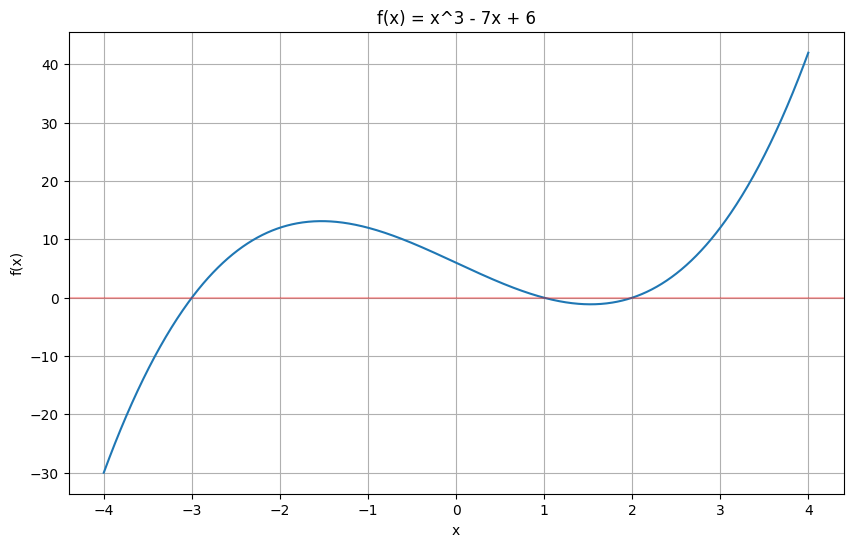

In [ ]:
# Visualizar la función
x = np.linspace(-4, 4, 1000)
y = [f(xi) for xi in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title("f(x) = x^3 - 7x + 6")
plt.xlabel("x")
plt.ylabel("f(x)")

Defino la función asi como la derivada para el método de Newthon Raphson

También gráfico la función por simple curiosidad

#### 1º Ejercicio

Implementación del método de bisección para encontrar raíces.
    
- Parámetros:
    
    f: La función para la cual buscamos la raíz
    
    a, b: Extremos del intervalo inicial [a, b]
    
    tol: Tolerancia (precisión deseada)
    
    max_iter: Número máximo de iteraciones
    
- Retorna:
    
    c: La aproximación de la raíz
    
    i: Número de iteraciones realizadas

In [ ]:
# Defino el metodod de Biseción

def biseccion(f, a, b, tol=1e-6, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe cambiar de signo en el intervalo")
    
    #iniciamos el proceso iterativo
    i = 0

    aproximaciones = [a, b]
    while (b - a) >= tol and i < max_iter:
        c = (a + b)  / 2
        aproximaciones.append(c)
        if f(c)  == 0:
         return c, 1, aproximaciones
        
        if f(a)  * f(c) < 0:
            b = c
        else:
                a = c
        i += 1
    return (a + b) /2, i, aproximaciones

# función para encontrar autamáticamente los intervalos iniciales con cambio de signo

def encontrar_intervalos(f, xmin, xmax, num_points=1000):
    x = np.linspace(xmin, xmax, num_points)
    y = [f(xi) for xi in x]
    intervalos = []
    for i in range(len(x) - 1):
        if y[i] * y[i + 1] < 0: # cambio de signo
            intervalos.append((x[i], x[i + 1]))
    return intervalos 

# Encontrarintervalos con cambio de signo

intervalos = encontrar_intervalos(f, -4, 4, 100)
print(f"Se encontraron {len(intervalos)} intervalos con cambio de signo")
for i, intervalos in enumerate(intervalos):
    print(f"intervalo {i + 1}: [{intervalos[0]:.4f}, {intervalos[1]:.4f}]")
    print(f" f({intervalos[0]:.4f}) = {f(intervalos[0]):.4f}")
    print(f" f({intervalos[1]:.4f}) = {f(intervalos[1]):.4f}")

Se encontraron 3 intervalos con cambio de signo
intervalo 1: [-3.0303, -2.9495]
 f(-3.0303) = -0.6144
 f(-2.9495) = 0.9873
intervalo 2: [0.9293, 1.0101]
 f(0.9293) = 0.2975
 f(1.0101) = -0.0401
intervalo 3: [1.9798, 2.0606]
 f(1.9798) = -0.0986
 f(2.0606) = 0.3253


In [ ]:
# Aplicar el metodo a los intervalos encontrados

print("\nAplicando el método de bisección a los intervalos encontrados")
raices = []
for i, intervalo in enumerate(intervalos):
    a, b = intervalos
    try:
        raiz, interaciones, aproximaciones = biseccion(f, a, b)
        raices.append((raiz, interaciones))
        print(f"Raiz {i+1}: x = {raiz:.10f} (encontrada en {interaciones} iteraciones)")
        print(f" f({raiz:.10f}) = {f(raiz):.10f}")

    except ValueError as e:
            print(f"Error en el intervalo {i+1}: {e}")

# Mostrar las raíces encontradas
print("\nResumen de raíces encontradas:")
for i, (raiz, iteraciones) in enumerate(raices):
    print(f"Raíz {i+1}: x = {raiz:.10f}")
    print(f"  f({raiz:.10f}) = {f(raiz):.10e}")
   
    


Aplicando el método de bisección a los intervalos encontrados
Raiz 1: x = 1.9999996917 (encontrada en 17 iteraciones)
 f(1.9999996917) = -0.0000015413
Raiz 2: x = 1.9999996917 (encontrada en 17 iteraciones)
 f(1.9999996917) = -0.0000015413

Resumen de raíces encontradas:
Raíz 1: x = 1.9999996917
  f(1.9999996917) = -1.5412912520e-06
Raíz 2: x = 1.9999996917
  f(1.9999996917) = -1.5412912520e-06


### Aplicación del método de bisección

El método de la Bisección consiste en dividir el intervalo [a,b] por la mitad, ver en cuál de las dos mitades cambia la función f de signo, y repetir esta operación en esa mitad. Así, hasta que no distingamos los extremos del intervalo, identificando la solución de f(x)=0 que está en el mismo, con sul punto medio. Es decir es; método de busqueda incremental que siempre divide el intervalo en 2.

$$
c = \frac{a + b}{2}
$$




- El método funciona así;
    
    1. Verificamos que f(a) y f(b) tienen signos opuestos

    2. Tomamos el punto medio c = (a + b)/2

    3. Evaluamos f(c)

    4. Si f(c) = 0, encontramos la raíz

    5. Si f(a) * f(c) < 0, la raíz está en [a,c]

    6. Si f(b) * f(c) < 0, la raíz está en [b,c]

    7. Y por ultimo repetimos hasta alcanzar la precisión deseada

In [ ]:
# Método de Newton-Raphson
def newton_raphson (f, df, x0, tol=1e-6, max_iter=1000):
    # Si la derivada es cercana a cero, no se puede aplicar el método
    x = x0
    aproximaciones = []

    for i in range(max_iter):
        if abs(df(x)) < 1e-10:
            raise ValueError("Derivada muy cercana a cero")
        # Formula de Newton-Raphson
        x_net = x - f(x) / df(x)
        aproximaciones.append(x_net)

        # Verificar convergencia
        if abs(x_net - x) < tol:
            return x_net, i+1, aproximaciones
        x = x_net
    return x, max_iter, aproximaciones

# Encontrar puntos iniciales cercanos a las posibles raíces
def encontrar_puntos_iniciales (f, xmin, xmax, num_points=50):
    x = np.linspace(xmin, xmax, num_points)
    y = [f(xi) for xi in x]
    # Ordenar puntos por valor de y
    sorted_indices = np.argsort(y)

    # Tomar los 5 puntos con menor valor de y
    puntos_iniciales = [x[i] for i in sorted_indices[:5]]

    # Flitrar puntos que estén muy cerca al cero
    filtrados = [puntos_iniciales[0]]
    for punto in puntos_iniciales[1:]:
        if all(abs(punto - p) > 0.5 for p in filtrados):
            filtrados.append(punto)

        return filtrados

# Encontrar puntos iniciales
puntos_iniciales = encontrar_puntos_iniciales(f, -4, 4)
print(f"Puntos seleccionados: {puntos_iniciales}")

Puntos seleccionados: [np.float64(-4.0)]


In [ ]:
# Aplicar el metodo de Newton-Raphson a los puntos iniciales
raices = []
raices_unicas = set()

for i, x0 in enumerate(puntos_iniciales):
    try:
        raiz, iteraciones, aproximaciones = newton_raphson(f, df, x0)

        # Verificar si la raíz ya ha sido encontrada
        es_nueva = True
        for r in raices_unicas:
            if abs(raiz - r) < 1e-5:
                es_nueva = False
                break
        
        if es_nueva:
            raices_unicas.add(raiz)
            raices.append((raiz, iteraciones, x0, aproximaciones))
            print(f"Desde X0 = {x0:.4f}:Raíz entontrada X = {raiz:.10f} (encontrada en {iteraciones} iteraciones)")
            print(f" f({raiz:.10f}) = {f(raiz):.10f}")

    except ValueError as e:
        print(f"Error en el punto inicial X0 = {x0:.4f}: {e}")

# Análisis de convergencia
print("\nComparación de convergencia Newton-Raphson")
for raiz, iteraciones, x0, aproximaciones in raices:
    # Calcular velocidad de convergencia
    if len(aproximaciones) > 3:
        erroes = [abs(x - raiz) for x in aproximaciones]
        print(f"Para Raiz {raiz:.6f} desde X0 = {x0:.6f}:")
        for i in range(1, min(5, len(aproximaciones))):
            print(f"Iteración {i}: Error = {erroes[i]:.10e}")

# Resumen final
print("\nResumen de raices encontradas con Newton-Raphson:")
for raiz, iteraciones, x0, _ in raices:
    print(f"Raíz: x = {raiz:.10f} (desde x0 = {x0:.4f}, en {iteraciones} iteraciones)")
    print(f"f ({raiz:.10f}) = {f(raiz):.10f}")

# Comparar Valores exactos con los encontrados
raices_exactas = [-3, 1, 2]
print("\nComparación con valores exactos:")
for raic_exacta in raices_exactas:
    encontrada = False
    for raiz, iteraciones, _, _ in raices:
        if abs(raiz - raic_exacta) < 1e-5:
            print(f"Raiz exacta {raic_exacta} encontrada como {raiz:.10f} en {iteraciones} iteraciones")
            encontrada = True
            break
    if not encontrada:
        print(f"Raiz exacta {raic_exacta} no encontrada con el metodo de Newton-Raphson")

Desde X0 = -4.0000:Raíz entontrada X = -3.0000000000 (encontrada en 5 iteraciones)
 f(-3.0000000000) = -0.0000000000

Comparación de convergencia Newton-Raphson
Para Raiz -3.000000 desde X0 = -4.000000:
Iteración 1: Error = 2.7408537310e-02
Iteración 2: Error = 3.3188727984e-04
Iteración 3: Error = 4.9555976656e-08
Iteración 4: Error = 0.0000000000e+00

Resumen de raices encontradas con Newton-Raphson:
Raíz: x = -3.0000000000 (desde x0 = -4.0000, en 5 iteraciones)
f (-3.0000000000) = -0.0000000000

Comparación con valores exactos:
Raiz exacta -3 encontrada como -3.0000000000 en 5 iteraciones
Raiz exacta 1 no encontrada con el metodo de Newton-Raphson
Raiz exacta 2 no encontrada con el metodo de Newton-Raphson


### Aplicación de método de Newton-Raphson

Este es un método iterativo que converge rápidamente a una raíz de \( f(x) \), si se elige un buen punto inicial \( x_0 \).  

La actualización de \( x \) en cada iteración se calcula como:


$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

El proceso se repite hasta que la diferencia entre iteraciones sea menor que una tolerancia \( epsilon \):

$$
|x_{n+1} - x_n| < \epsilon
$$


- Caraterísticas principales:

    1. **Convergencia cuadrática:** Converge mucho más rapido que el método de bisección cuando está cerca de la raiz.

    2. **Requiere el cálculo de la derivada:** Es fundamental conocer la derivada de la función.

    3. **Sensible al punto inicial:** La elección del punto inicial es crucial para la covergencia.

    4. **No garantiza la convergencia:** Puede diverger o entrar en ciclos en ciertos casos

### Comparación entre métodos

- **Similitudes:**

    - Ambos son métodos interativos para encontrar raíces de funciones

    - Ambos pueden alcanzar la precisión deseada

- **Diferencias:**

    1. Requisitos iniciales:
        
        - Bisección: Necesita un intervalo [a,b] donde f(a) y f(b) tengan signos opuestos.

        - Newton_Raphson: Necesita un punto inicial X0 y requiere conocer la derivada 
    
    2. Velocidad de convergencia:

        - Bisección: Convergencia lineal(Reduce el error a la mitad en cada iteración)

        - Newton_Raphson: Convergencia cuadrática(El número de dígitos correctos aproximadamente se duplica en cada una.)

    3. Robustez:

        - Bisección: Siempre converge si los valores iniciales cumplen las condiciones.

        - Newton_Raphson: Puede fallar si la derivada se acerca a 0 o si el punto inicial está lejos de la raíz.

    4. Eficacia computacional:

        - Bisección: Menos calculos por iteración(Solo evaluaciones de la función).

        - Newton_Raphson: Más calculos por iteración (función y derivada), pero necesita menos iteraciones.

#### Recomendaciones para elegir entre los métodos

1. **Bisección**

    - No se necesite garantía de convergencia

    - En caso de no hallar la derivada

    - Cuando la función  tenga discontinuidades o derivadas que se acerquen a 0

2. **Newton-Ranphson**

    - Necesites convergencia rápida 

    - Cuentes con la derivada 

    - Teniendo una buena estimación inicial


#### 2º Ejercicio

- Regla del trapecio

In [ ]:
# Definimos la función
def g(x):
    return np.exp(-x**2)

# Implementación de la regla del trapecio
def trapecio(f, a, b, n):
    h = (b - a) / n
    suma = 0.5 * (f(a) + f(b))
    for i in range (1, n):
        suma += f(a + i * h)
        return h * suma
    
# Valores del intervalo
a = 0 
b = 1

# Probamos varios números de subintervalos
valores_n = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# Calculamos el valor exacto
valor_exacto, _ = integrate.quad(g, a, b)
# Calculamos las aproximidades
resultados_trapecio = []
errores_trapecio = []

for n in valores_n:
    aprox_trapecio = trapecio(g, a, b, n)
    resultados_trapecio.append(aprox_trapecio)
    errores_trapecio.append(abs(aprox_trapecio - valor_exacto))

# Imprimir los resultados en formato tabla
print(f"Integral de g(x) = e^(-x^2)  en [0, 1] ")
print(f"Valor exacto: {valor_exacto:.16f}")
print("\nResultados con la regla del trapecio: ")
print("-" *70)
print(f"{'n':>6} | {'Aproximacion':^22} |{'Error Absoluto':^22}")
print("-" *70)

for i, n in enumerate(valores_n):
    print(f"{n:6} | {resultados_trapecio[i]:22.16f} | {errores_trapecio[i]:22.16f}")

# Análisis de convergencia
print("\nAnálisis de orden de convergencia:")
for i in range(1, len(valores_n)):
    ratio = errores_trapecio[i-1] / errores_trapecio[i]
    factor = valores_n[i] / valores_n[i-1]
    orden = np.log(ratio) / np.log(factor)
    print(f"De n={valores_n[i-1]} a n={valores_n[i]}: ratio de error = {ratio:.4f}, orden ≈ {orden:.4f}")

# Información adicional sobre el método
print("\nFórmula de la regla del trapecio:")
print("∫[a,b] f(x)dx ≈ (b-a)/n × [f(a)/2 + f(x₁) + f(x₂) + ... + f(xₙ₋₁) + f(b)/2]")
print("\nDonde:")
print("  - h = (b-a)/n es el tamaño del subintervalo")
print("  - xᵢ = a + i×h son los puntos de evaluación")

Integral de g(x) = e^(-x^2)  en [0, 1] 
Valor exacto: 0.7468241328124271

Resultados con la regla del trapecio: 
----------------------------------------------------------------------
     n |      Aproximacion      |    Error Absoluto    
----------------------------------------------------------------------
     2 |     0.7313702518285630 |     0.0154538809838641
     4 |     0.4058381958497992 |     0.3409859369626279
     8 |     0.2085545196988912 |     0.5382696131135358
    16 |     0.1050025681284899 |     0.6418215646839371
    32 |     0.0525926135864905 |     0.6942315192259366
    64 |     0.0263077439025097 |     0.7205163889099174
   128 |     0.0131553022444694 |     0.7336688305679577
   256 |     0.0065778299293479 |     0.7402463028830791
   512 |     0.0032889373162026 |     0.7435351954962245

Análisis de orden de convergencia:
De n=2 a n=4: ratio de error = 0.0453, orden ≈ -4.4637
De n=4 a n=8: ratio de error = 0.6335, orden ≈ -0.6586
De n=8 a n=16: ratio de error 

- Regla de Simpson

In [ ]:
# Defino el métdodo de Simpson
def sinmpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n debe ser un número par")
    
    h = (b - a) / n
    suma = f(a) + f(b)

    # Sumamos los términos con coficiente 4 (índice para impares)
    for i in range(1, n, 2):
        suma += 4 * f(a + i * h)
    # Sumamos los términos con coeficiente 2 (índice para pares)
    for i in range(2, n, 2):
        suma += 2 * f(a + i * h)
    return (h / 3) * suma

a = 0
b = 1

# Probamos varios números de subintervalos
valores_n = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# Calculamos el valor exacto
valor_exacto, _ = integrate.quad(g, a, b)
# Calculamos las aproximidades
resultados_simpson = []
errores_simpson = []

for n in valores_n:
    aprox_simpson = sinmpson(g, a, b, n)
    resultados_simpson.append(aprox_simpson)
    errores_simpson.append(abs(aprox_simpson - valor_exacto))


# Imprimir los resultados en formato tabla
print(f"Integral de g(x) = e^(-x^2) en [0, 1]")
print(f"Valor exacto: {valor_exacto:.16f}")
print("\nResultados con la regla de Simpson:")
print("-" * 70)
print(f"{'n':>6} | {'Aproximación':^22} | {'Error Absoluto':^22}")
print("-" * 70)

for i, n in enumerate(valores_n):
    print(f"{n:6} | {resultados_simpson[i]:22.16f} | {errores_simpson[i]:22.16f}")

Integral de g(x) = e^(-x^2) en [0, 1]
Valor exacto: 0.7468241328124271

Resultados con la regla de Simpson:
----------------------------------------------------------------------
     n |      Aproximación      |     Error Absoluto    
----------------------------------------------------------------------
     2 |     0.7471804289095103 |     0.0003562960970832
     4 |     0.7468553797909873 |     0.0000312469785602
     8 |     0.7468261205274667 |     0.0000019877150396
    16 |     0.7468242574357302 |     0.0000001246233031
    32 |     0.7468241406069850 |     0.0000000077945579
    64 |     0.7468241332996725 |     0.0000000004872454
   128 |     0.7468241328428811 |     0.0000000000304540
   256 |     0.7468241328143309 |     0.0000000000019038
   512 |     0.7468241328125453 |     0.0000000000001182


In [ ]:
# Cálculo teórico
print("\nAnálisis de orden de convergencia:")
for i in range(1, len(valores_n)):
    ratio = errores_simpson[i-1] / errores_simpson[i]
    factor = valores_n[i] / valores_n[i-1]
    orden = np.log(ratio) / np.log(factor)
    print(f"De n={valores_n[i-1]} a n={valores_n[i]}: ratio de error = {ratio:.4f}, orden ≈ {orden:.4f}")

# Información adicional sobre el método
print("\nFórmula de la regla de Simpson:")
print("∫[a,b] f(x)dx ≈ (b-a)/(3n) × [f(a) + 4f(x₁) + 2f(x₂) + 4f(x₃) + ... + 2f(xₙ₋₂) + 4f(xₙ₋₁) + f(b)]")
print("\nDonde:")
print("  - h = (b-a)/n es el tamaño del subintervalo")
print("  - xᵢ = a + i×h son los puntos de evaluación")
print("  - Los coeficientes siguen el patrón 1,4,2,4,2,...,4,2,4,1")
print("\nLa regla de Simpson aproxima la función en cada par de subintervalos con un polinomio cuadrático,")
print("lo que le permite obtener mayor precisión que la regla del trapecio.")


Análisis de orden de convergencia:
De n=2 a n=4: ratio de error = 11.4026, orden ≈ 3.5113
De n=4 a n=8: ratio de error = 15.7200, orden ≈ 3.9745
De n=8 a n=16: ratio de error = 15.9498, orden ≈ 3.9955
De n=16 a n=32: ratio de error = 15.9885, orden ≈ 3.9990
De n=32 a n=64: ratio de error = 15.9972, orden ≈ 3.9997
De n=64 a n=128: ratio de error = 15.9994, orden ≈ 3.9999
De n=128 a n=256: ratio de error = 15.9963, orden ≈ 3.9997
De n=256 a n=512: ratio de error = 16.1014, orden ≈ 4.0091

Fórmula de la regla de Simpson:
∫[a,b] f(x)dx ≈ (b-a)/(3n) × [f(a) + 4f(x₁) + 2f(x₂) + 4f(x₃) + ... + 2f(xₙ₋₂) + 4f(xₙ₋₁) + f(b)]

Donde:
  - h = (b-a)/n es el tamaño del subintervalo
  - xᵢ = a + i×h son los puntos de evaluación
  - Los coeficientes siguen el patrón 1,4,2,4,2,...,4,2,4,1

La regla de Simpson aproxima la función en cada par de subintervalos con un polinomio cuadrático,
lo que le permite obtener mayor precisión que la regla del trapecio.


### Regla del Trapecio

Está aproxima el área bajo la curva usando segmentos de **lineas rectas** entre puntos de la función.

La integral de \(f(x)\) es un intervalo \([a, b]\) que se aproxima dividiendo el intervalo en (n) subintervalos de ancho \(h = \frac{b-a} \) y aplicando:

$$
\int_a^b f(x) \,dx \approx \frac{h}{2} \sum_{i=0}^{n} \left( f(x_i) + f(x_{i+1}) \right)
$$

### Regla de Simpson

Aproxima el área bajo de la curva mediante **parábolas** en lugar de segmentos rectos. Se requieren que \(n \) sea **par** para que se aplique la fórmula:

$$
\int_a^b f(x) \,dx \approx \frac{h}{3} \sum_{i=0}^{n} \left( f(x_i) + 4f(x_{i+1}) + f(x_{i+2}) \right)
$$

#### Comparación


| **Método**   | **Aproximación** | **Precisión** | **Orden del error** | **¿Cuándo usarla?** |
|--------------|-----------------|---------------|------------------|------------------|
| **Trapecio**  | Líneas rectas   | Menos precisa | \( O(h^2) \)  | Cuando se necesita rapidez y simplicidad, especialmente si la función no tiene mucha curvatura. |
| **Simpson**   | Parábolas       | Más precisa   | \( O(h^4) \)  | Cuando se busca mayor exactitud y se pueden usar subintervalos pares. Ideal para funciones suaves. |

**Resumen:**

- Usaremos **la regla del trapecio** si necesitamos rapidez y simplicidad

- Y usaremos **la regla de simpson** si la precisión es fundamental y se pueda usar un número par de subintervalo